To analyze stationarity of a process (for mathematical
expectation and variance)


To analyze covariance function. To define covariance
(or correlation window)


To estimate spectral density function with using
different functions for spectral window


To filter high frequencies (noise) with using various
filters (e.g. moving average, Gaussian filter)

To repeat estimation of spectral density and compare
with result for non-filtered data

To built Rice model for process (using filtered and non-
filtered data)


To built auto-regression model filtered and non-filtered
data. To analyze residual error and to define
appropriate order of model

To find additional factors that influence on chosen
index (e.g. oil prices, gold prices, number of deaths,
other indexes etc.)


To analyze mutual correlation functions among factors

To build model in a form of linear dynamical system,
using additional factors. To analyze residual error and
to define appropriate order of model


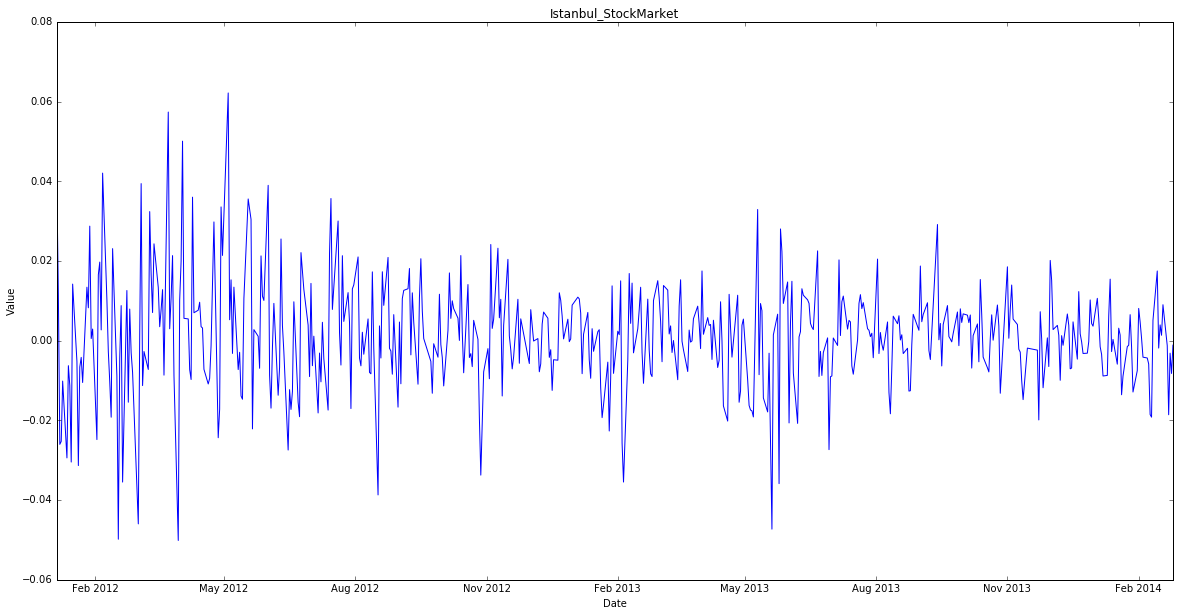

In [140]:
%matplotlib inline
import locale

import datetime
import pandas as pd
import matplotlib.pyplot as plt

def month_converter(month):
    split = str(month).split("-")
    month = split[1]
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return datetime.datetime(day=int(split[0]), month=months.index(month) + 1, year=int("20"+split[2]))

locale.setlocale(locale.LC_NUMERIC, '')
raw_data = pd.read_csv('Istanbul_StockMarket_12-14.csv', delimiter=';', names=["date", "value"])
raw_data['value'] = raw_data['value'].str.replace(',', '.').astype('float')
raw_data['date'] = raw_data['date'].apply(month_converter)

plt.figure(figsize=(20, 10))
plt.title('Istanbul_StockMarket')
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(raw_data['date'].values, raw_data['value'].values, label="")
plt.show()



Adding 0 for days of

In [2]:
start_date = raw_data.values[0, 0]
end_date = raw_data.values[-1, 0]
date_list = [(start_date + datetime.timedelta(days=x)) for x in range(0, (end_date - start_date).days + 1)]

data = pd.DataFrame(float(0), index=date_list, columns=["value"])

for raw_value in raw_data.values:
    data.ix[raw_value[0]] =  raw_value[1]
    
data


,value
2012-01-05,0.037082
2012-01-06,0.011404
2012-01-07,-0.026020
2012-01-08,-0.025251
2012-01-09,-0.010143
2012-01-10,0.000000
2012-01-11,0.000000
2012-01-12,-0.029419
2012-01-13,-0.006275
2012-01-14,-0.011280


Rolling mean, var, std 

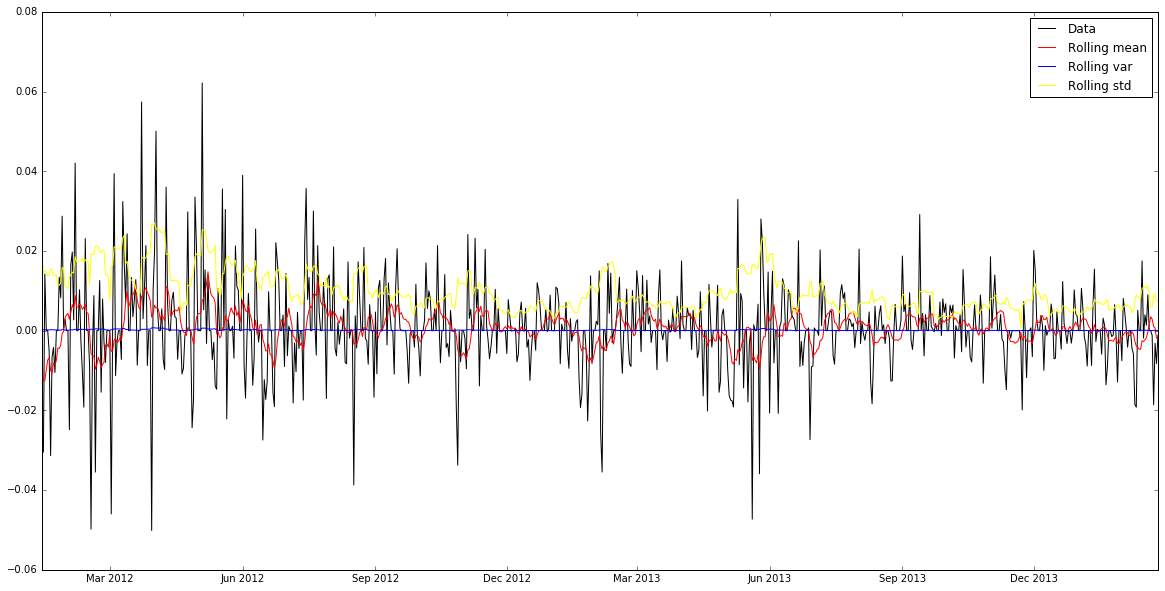

In [3]:
window = 10

rolling = data.rolling(window=window)
rolmean = rolling.mean()
rolvar =  rolling.var()   
rolstd =  rolling.std()   


plt.figure(2, figsize=(20,10))
plt.plot(data[window:], color='black', label='Data')
plt.plot(rolmean, color='red', label='Rolling mean')
plt.plot(rolvar, color='blue', label = 'Rolling var')
plt.plot(rolstd, color='yellow', label = 'Rolling std')
plt.legend(loc='best')
plt.show()



 Autocovariance      

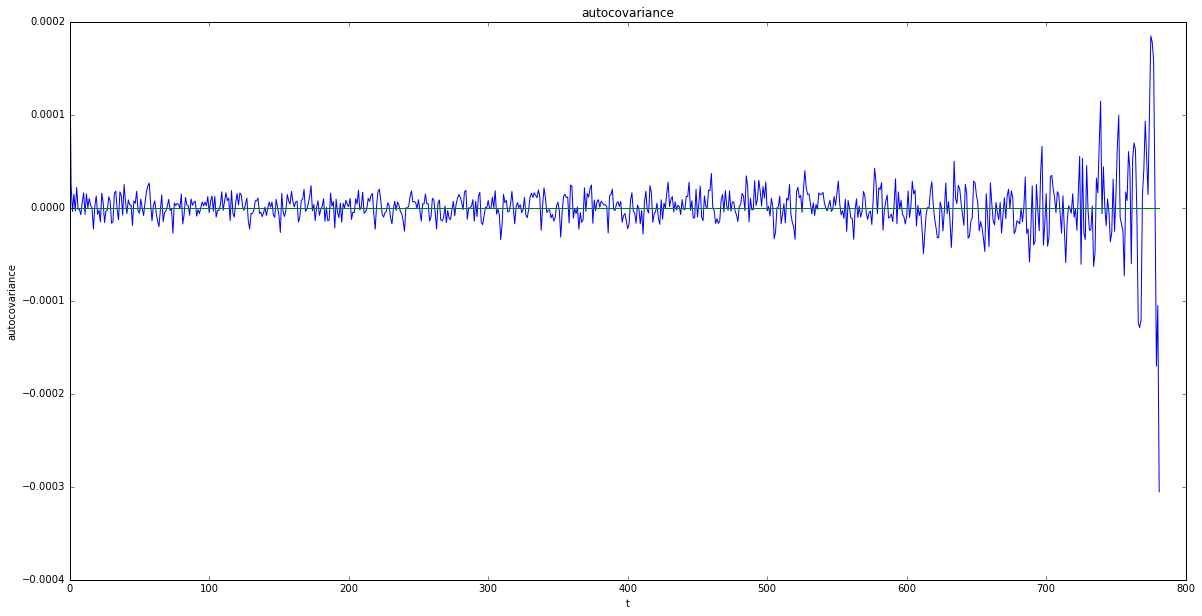

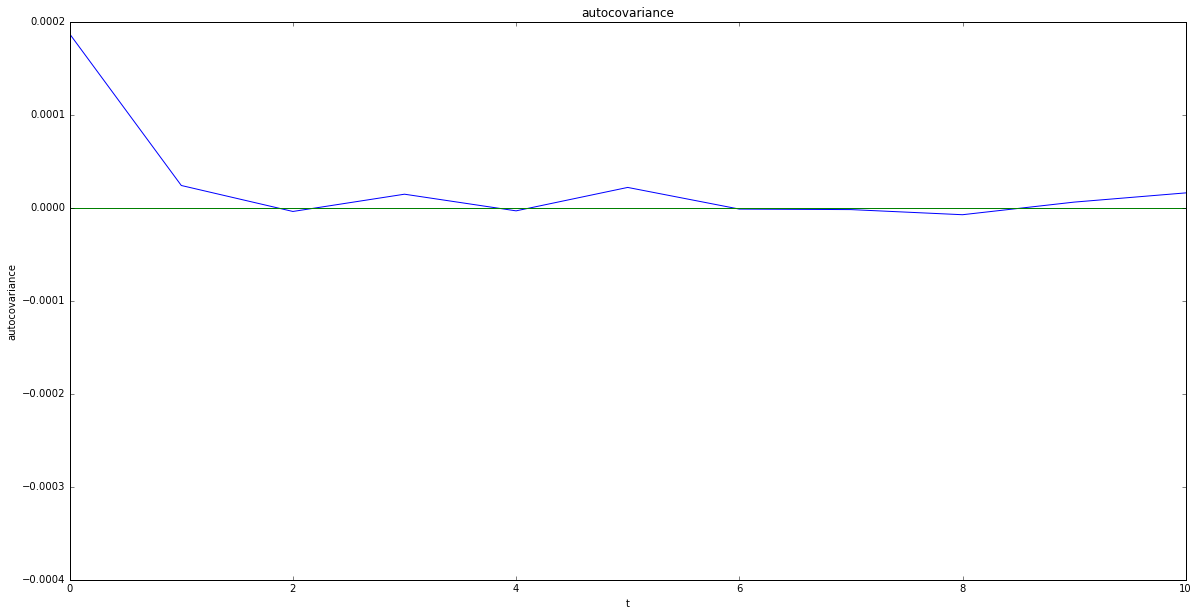

In [4]:
import numpy

values = data.values[:,0]

def cov(t,vals):
    mean = 0
    N = len(vals)
    
    def isNotZero(i,t):
        if vals[i] != 0 and vals[i+t] != 0: return True
        else: return False

    def pairsCoutn(t): 
        return sum([1 if isNotZero(i,t) else 0 for i in range(0, N - t - 1)])
    

    return 1/pairsCoutn(t) * sum([(vals[i] - mean)*(vals[i+t] - mean) if isNotZero(i,t) else 0 for i in range(0, N - t - 1)])


def autocov(vals):
    return [cov(t,vals) for t in range(0, len(vals) - 1)]

x = [i for i in range(0, len(values) - 1)]
y = autocov(values)


plt.figure(figsize=(20, 10))
plt.title('autocovariance')
plt.xlabel('t')
plt.ylabel('autocovariance')
plt.plot(x, y, label="")
plt.plot(x, [0 for i in range(0, len(values) - 1)], label="")

plt.show()
    
    

plt.figure(figsize=(20, 10))
plt.title('autocovariance')
plt.xlabel('t')
plt.ylabel('autocovariance')
plt.plot(x, y, label="")
plt.plot(x, [0 for i in range(0, len(values) - 1)], label="")
plt.xlim(0,10)

plt.show()
        

Spectrum density estimation

In [5]:
import math
import numpy as np


def lamBarret(t,taumax):
    if t > taumax: return 0 
    else: return 1
    
def lamBarretMod(t,taumax):
    if t > taumax:  return 0 
    else: return 1 - math.fabs(t)/taumax
    
def lamHann(t,taumax):
    if t > taumax:  return 0 
    else: return 0.5*(1 + math.cos((math.pi * t)/taumax))
    
def lamHemming(t,taumax):
    if t > taumax:  return 0 
    else: return 0.54 + 0.46 * math.cos((math.pi * t)/taumax)
    
def spectrum(w, smoothFunction,vals,taumax):    
    return (1/math.pi) * sum([smoothFunction(t,taumax)*cov(t,vals)*math.cos(w*t) for t in np.arange(0, taumax)] )

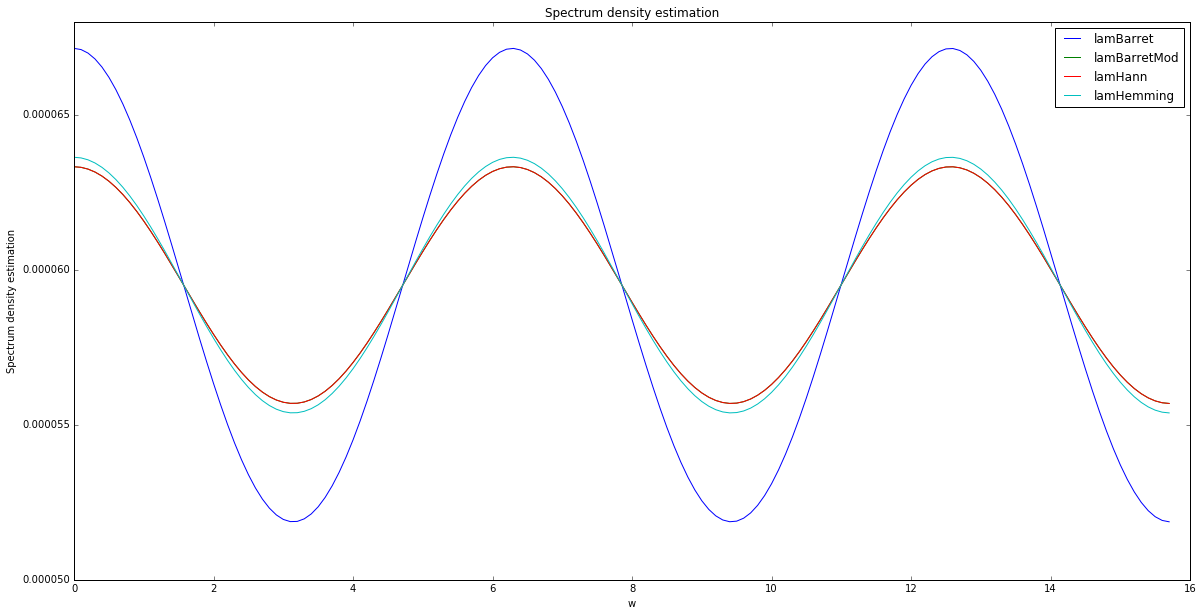

In [6]:
ws = [i for i in np.arange(0, math.pi*5, 0.1)]    

taumax = 2  

plt.figure(figsize=(20, 10))
plt.title('Spectrum density estimation')
plt.xlabel('w')
plt.ylabel('Spectrum density estimation')    
plt.plot(ws, [spectrum(w,lamBarret,values,taumax) for w in ws], label='lamBarret')
plt.plot(ws, [spectrum(w,lamBarretMod,values,taumax) for w in ws], label='lamBarretMod')
plt.plot(ws, [spectrum(w,lamHann,values,taumax) for w in ws], label='lamHann')
plt.plot(ws, [spectrum(w,lamHemming,values,taumax) for w in ws], label='lamHemming')
plt.legend()
plt.show()    

Simple Moving Average Filtering

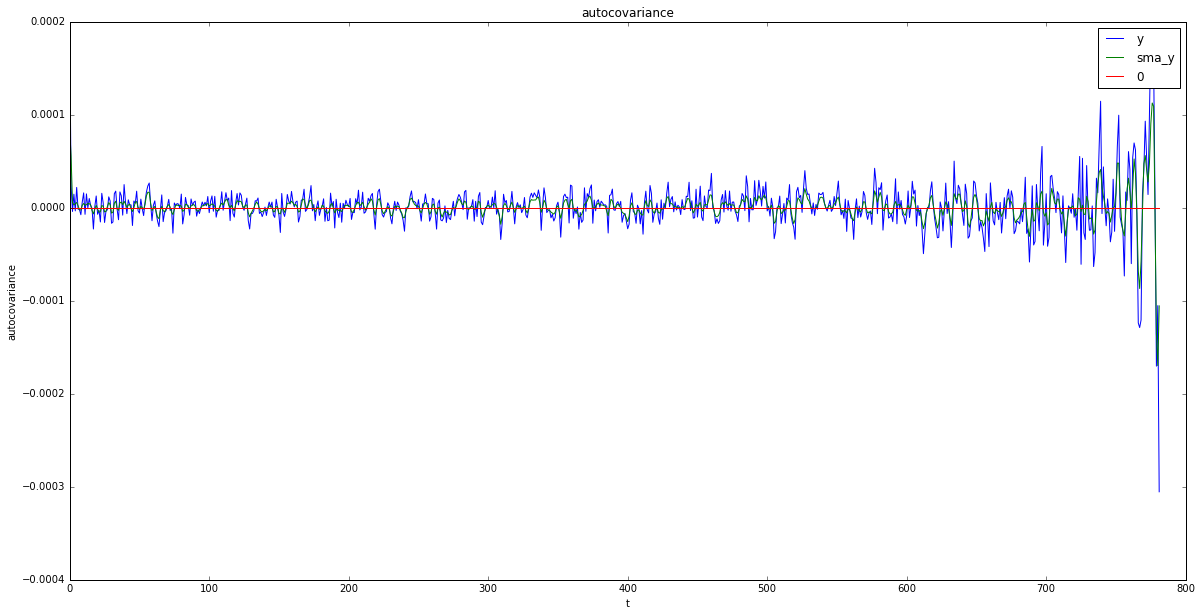

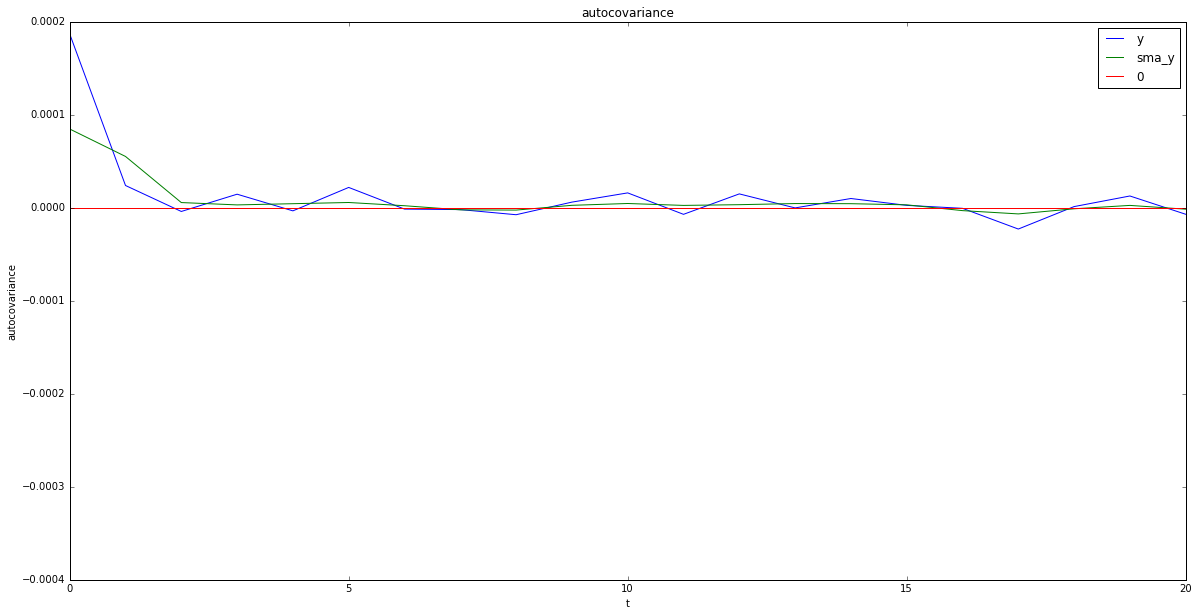

In [21]:
from __future__ import division
from numpy import linspace, loadtxt, ones, convolve
import numpy as numpy


def movingaverage(interval, window_size):
    window = numpy.ones(int(window_size))/float(window_size)
    return numpy.convolve(interval, window, 'same')

 
x = [i for i in range(0, len(values) - 1)]
y = autocov(values)

sma_values = movingaverage(values, 2)
sma_y = autocov(sma_values)


plt.figure(figsize=(20, 10))
plt.title('autocovariance')
plt.xlabel('t')
plt.ylabel('autocovariance')
plt.plot(x, y, label="y")
plt.plot(x, sma_y, label="sma_y")
plt.plot(x, [0 for i in range(0, len(y))], label="0")
plt.legend()
plt.show()    
    

plt.figure(figsize=(20, 10))
plt.title('autocovariance')
plt.xlabel('t')
plt.ylabel('autocovariance')
plt.plot(x, y, label="y")
plt.plot(x, sma_y, label="sma_y")
plt.plot(x, [0 for i in range(0, len(y))], label="0")
plt.legend()
plt.xlim(0,20)

plt.show()

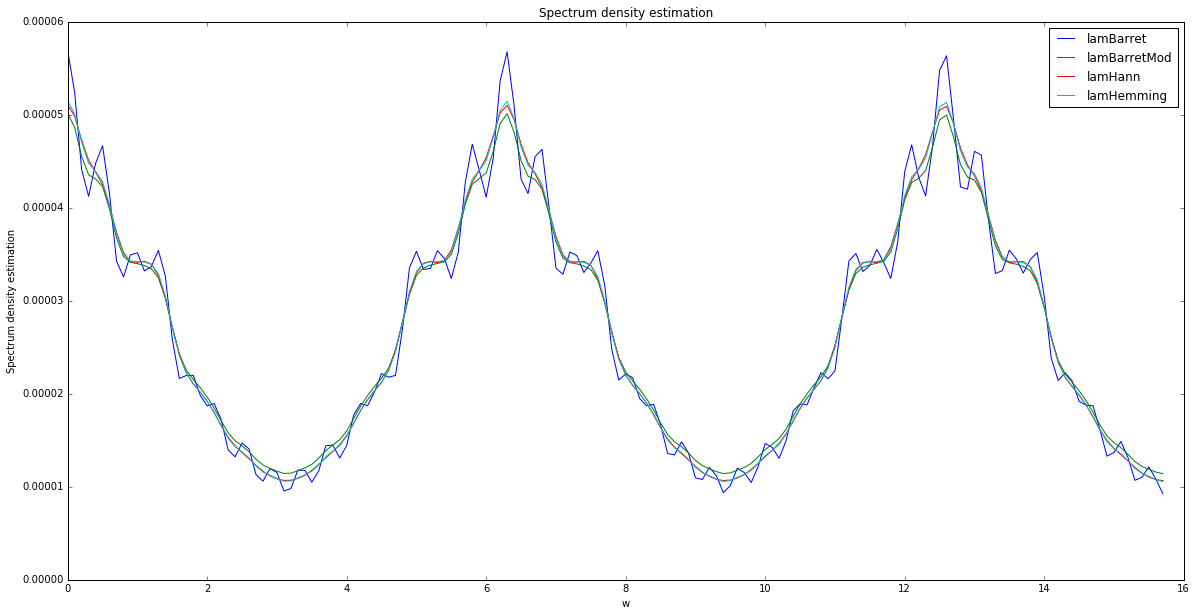

In [22]:
taumax = 17
ws = [i for i in np.arange(0, math.pi*5, 0.1)]    

plt.figure(figsize=(20, 10))
plt.title('Spectrum density estimation')
plt.xlabel('w')
plt.ylabel('Spectrum density estimation')    
plt.plot(ws, [spectrum(w,lamBarret,sma_values,taumax) for w in ws], label='lamBarret')
plt.plot(ws, [spectrum(w,lamBarretMod,sma_values,taumax) for w in ws], label='lamBarretMod')
plt.plot(ws, [spectrum(w,lamHann,sma_values,taumax) for w in ws], label='lamHann')
plt.plot(ws, [spectrum(w,lamHemming,sma_values,taumax) for w in ws], label='lamHemming')
plt.legend()
plt.show()    

arima_model

In [288]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(data, order=(2, 1, 0))  
# results_AR = model.fit(disp=-1)  
# plt.figure(1, figsize=(20,10))
# plt.plot(data)
# plt.plot(results_AR.fittedvalues, color='red')

Rice Model

In [231]:
[np.random.rayleigh(i,1)[0] for i in range(1, 150)]

[0.91262024974657896,
 3.1275888774859983,
 4.3131363262553126,
 8.3029324190272664,
 7.597012614533126,
 11.328252017429827,
 5.4649057922736635,
 3.8243176796373954,
 17.771378798635915,
 11.229955355438134,
 5.8070230817353865,
 20.094247690706776,
 9.8572428597187809,
 5.6444176472851391,
 7.8732603162330319,
 18.088922013856472,
 32.333872891207854,
 1.7981755487520992,
 30.850594348019506,
 16.890906024674468,
 12.307327043184117,
 24.6213108496991,
 77.879347460113692,
 45.218403634905776,
 16.528953311679093,
 15.792858212789115,
 16.554715627429186,
 40.992507870152025,
 12.23388126928905,
 39.110294906603002,
 26.613173338494931,
 31.37926590088902,
 54.109768370501918,
 66.253087556686694,
 23.994457141840464,
 30.744778161240205,
 34.210220156385901,
 56.225824197964876,
 59.024230991025952,
 31.575519605544184,
 44.263940564128333,
 70.514263606871282,
 30.233106522939583,
 38.277610117778181,
 45.315952935376686,
 36.210267182356937,
 50.928102573363233,
 35.3625774063108

c1 =[7.2007861741520977e-07, 8.7745569352958762e-07, 2.1597088131501844e-06, 3.5298336030500919e-07, 1.3841900556702532e-06, 2.5404474340744605e-07, 1.9196657700047613e-07, 2.4006095192452485e-06, 9.3199468150311016e-07, 5.9012445490095576e-07, 5.8602797885416214e-07, 5.0558548080255358e-07, 7.5056862123130284e-07, 2.6182968873975817e-07, 5.3536857144373792e-07, 8.3986090185122739e-07, 6.8106939626147862e-07, 8.1993058633236712e-07, 1.5417832727040499e-06, 1.594809627227781e-06, 8.1760079542910079e-07, 8.7618331732864848e-07, 1.2393203807752409e-06, 1.8532343972107617e-06, 1.1501646060094782e-06, 2.1815586037135298e-06, 8.5018854869894818e-07, 3.1285510890165339e-07, 5.5698168799992396e-07, 9.2655182285675475e-07, 7.1610306058393742e-07]
phi = [10.482014507833089, 11.682204967894487, 5.7397006276663536, 7.7228846105064326, 8.6187440869758394, 3.8653389203661277, 5.2718243870186852, 10.695599516219687, 2.3288548853081608, 11.121125556278145, 9.3297467457071548, 3.1205433992430889, 7.795

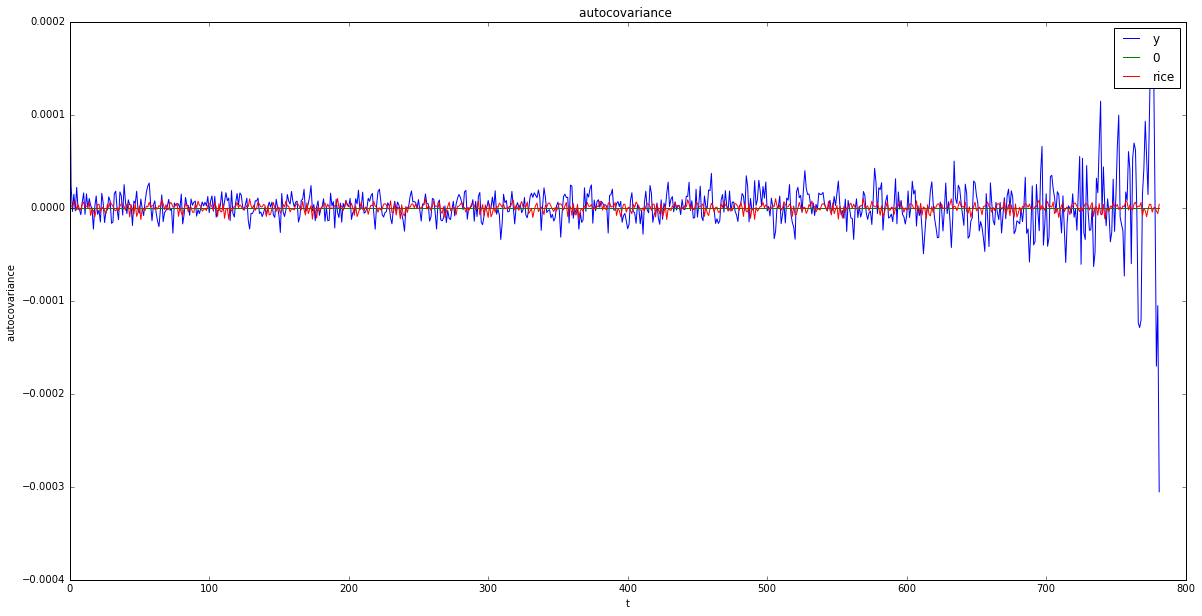

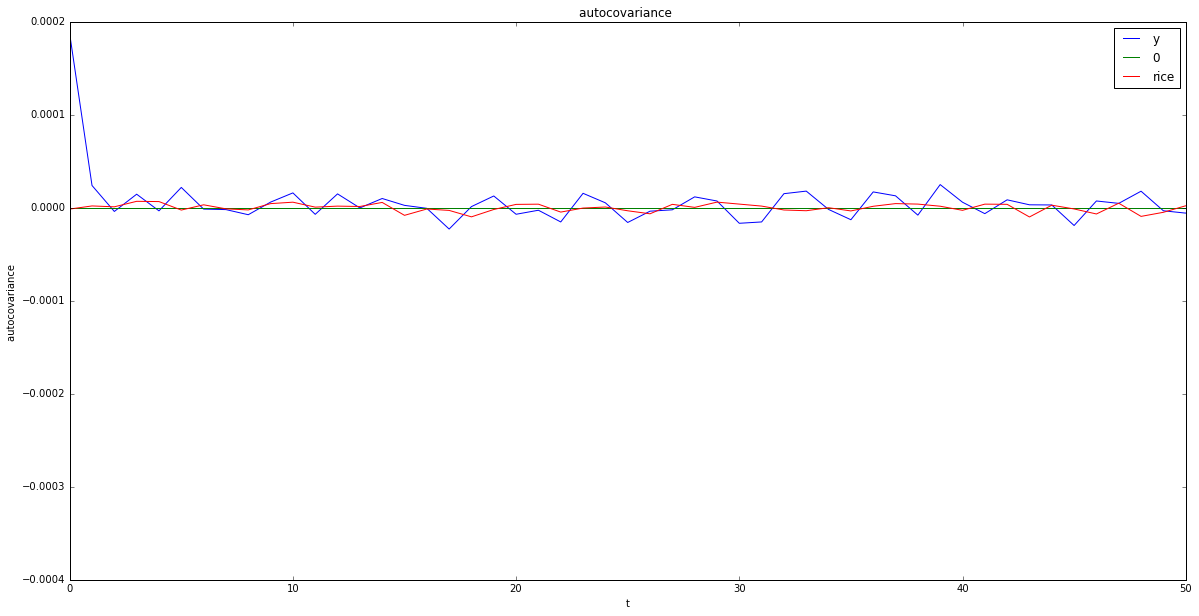

In [25]:
maxw = math.pi
deltaw = 0.1

taumax = 2

c1 = [np.random.rayleigh(math.sqrt(spectrum(w * deltaw,lamBarretMod,values,taumax))*deltaw/1000, 1)[0] for w in np.arange(1, maxw/deltaw)]
phi = [np.random.rayleigh(2*math.pi, 1)[0] for w in np.arange(1, maxw/deltaw)]

print("c1 ="+str(c1))
print("phi = "+str(phi))


def rice(t):
    return sum([c1[w]*math.cos(w*deltaw*t+phi[w]) for w in range(1, math.floor(maxw/deltaw))])


x = [i for i in range(0, len(values) - 1)]
y = autocov(values)

plt.figure(figsize=(20, 10))
plt.title('autocovariance ')
plt.xlabel('t')
plt.ylabel('autocovariance ')
plt.plot(x, y, label="y")
plt.plot(x, [0 for i in range(0, len(values) - 1)], label="0")
plt.plot(x, [rice(i) for i in range(0, len(values) - 1)], label="rice")
plt.legend()
plt.show()
    
    

plt.figure(figsize=(20, 10))
plt.title('autocovariance ')
plt.xlabel('t')
plt.ylabel('autocovariance ')
plt.plot(x, y, label="y")
plt.plot(x, [0 for i in range(0, len(values) - 1)], label="0")
plt.plot(x, [rice(i) for i in range(0, len(values) - 1)], label="rice")
plt.xlim(0,50)
# plt.ylim(0.0001,-0.0001)
plt.legend()
plt.show()


c1 =[8.8635892015496113e-07, 9.2273420872495376e-07, 2.5684945956998252e-07, 3.4223560590991373e-07, 1.1608219747700843e-06, 1.2237842004216501e-06, 1.5153776481140529e-06, 5.9272747812617403e-07, 1.0423846848083639e-06, 8.3095892500100992e-07, 7.7705240130742861e-08, 3.9347756219850603e-07, 8.913361523411169e-07, 6.7523440962362705e-07, 9.5666192605339319e-07, 8.9657618203604889e-07, 4.9535677593897833e-07, 3.9424079006013497e-07, 4.952825622683249e-07, 4.6291602907711966e-07, 2.7196352880423062e-07, 4.8965048623538687e-07, 7.5251656045079647e-07, 2.1606511351077776e-07, 5.2008865196552769e-07, 6.0501867982648099e-07, 1.5444967828053245e-07, 9.3009152799433099e-07, 7.4849236623972542e-07, 2.6153245038005218e-07, 4.9581776658639736e-07]
phi = [17.845071095831454, 8.7043991961623401, 2.9753125731525585, 7.016705528205569, 6.5506726548936518, 10.297461009245323, 4.2740038055964247, 7.9157288022425876, 16.277594985644029, 23.223120636717638, 8.5731364270217423, 6.6633521121892434, 3.19020

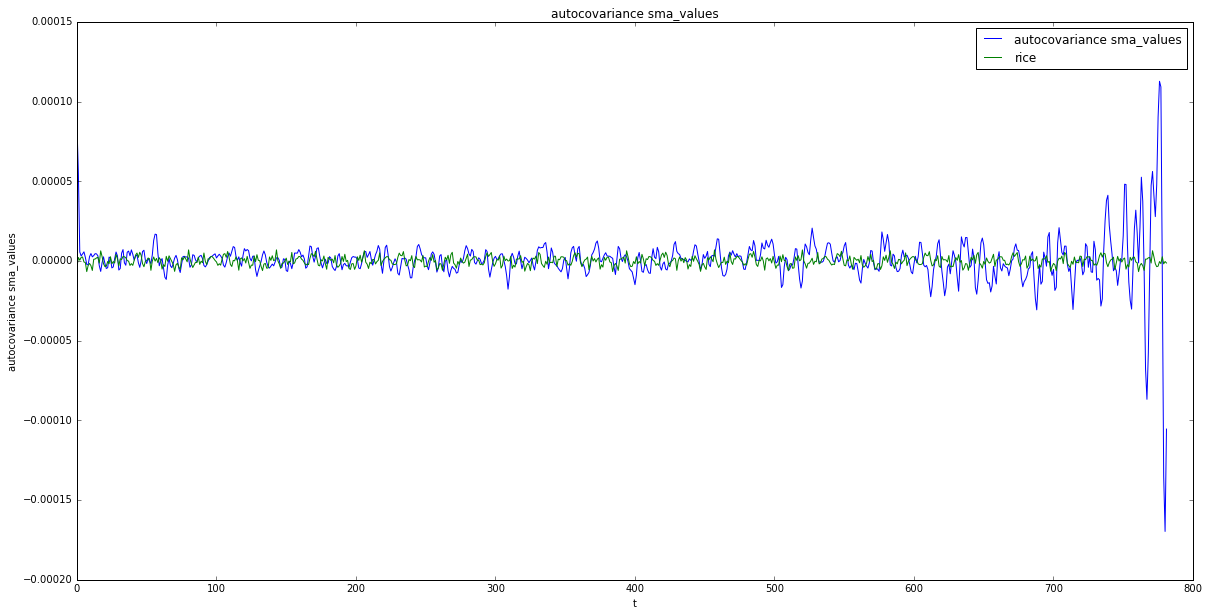

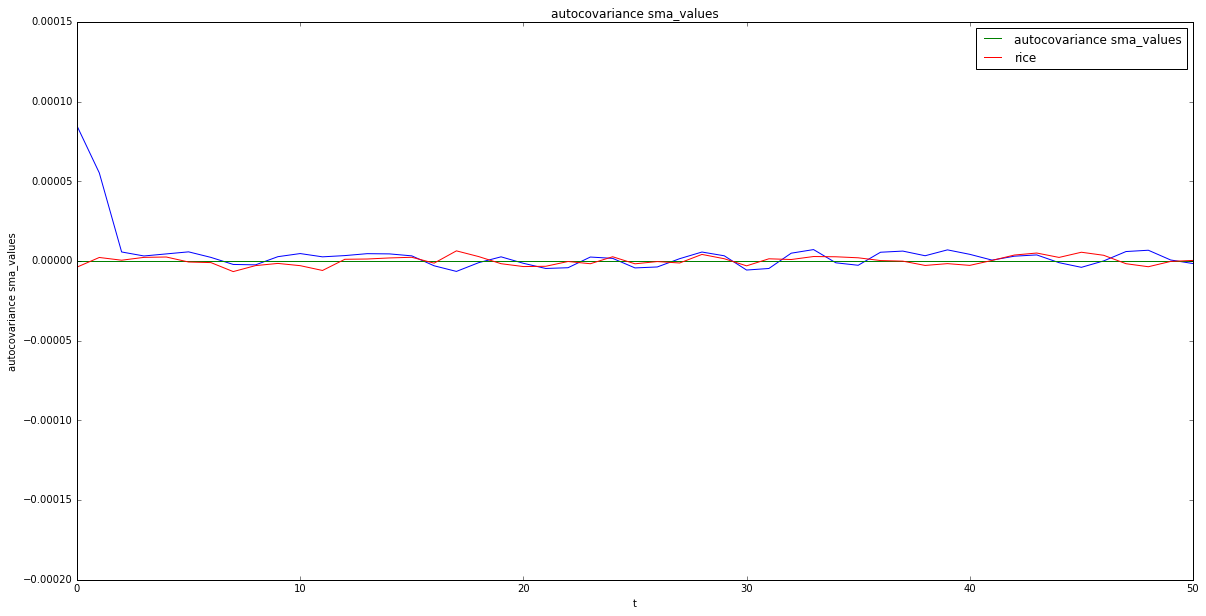

In [27]:
maxw = math.pi
deltaw = 0.1

taumax = 17

c1 = [np.random.rayleigh(math.sqrt(spectrum(w * deltaw, lamBarretMod, sma_values, taumax))*deltaw/1000, 1)[0] for w in np.arange(1, maxw/deltaw)]
phi = [np.random.rayleigh(2*math.pi, 1)[0] for w in np.arange(1, maxw/deltaw)]

print("c1 ="+str(c1))
print("phi = "+str(phi))


def rice(t):
    return sum([c1[w]*math.cos(w*deltaw*t+phi[w]) for w in range(1, math.floor(maxw/deltaw))])



x = [i for i in range(0, len(values) - 1)]
y = autocov(sma_values)

plt.figure(figsize=(20, 10))
plt.title('autocovariance sma_values')
plt.xlabel('t')
plt.ylabel('autocovariance sma_values')
plt.plot(x, y, label="autocovariance sma_values")
plt.plot(x, [rice(i) for i in range(0, len(values) - 1)], label="rice")
plt.legend()
plt.show()
    
    

plt.figure(figsize=(20, 10))
plt.title('autocovariance sma_values')
plt.xlabel('t')
plt.ylabel('autocovariance sma_values')
plt.plot(x, y, label="")
plt.plot(x, [0 for i in range(0, len(values) - 1)], label="autocovariance sma_values")
plt.plot(x, [rice(i) for i in range(0, len(values) - 1)], label="rice")
plt.xlim(0,50)
# plt.ylim(0.0001,-0.0001)
plt.legend()
plt.show()


Auto-regression model

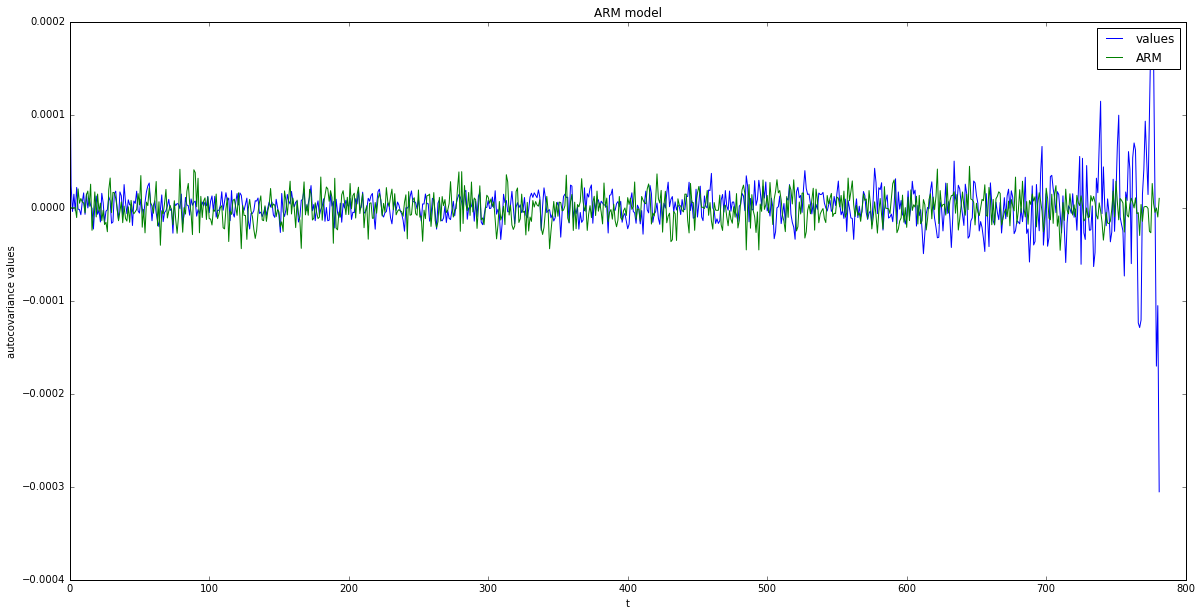

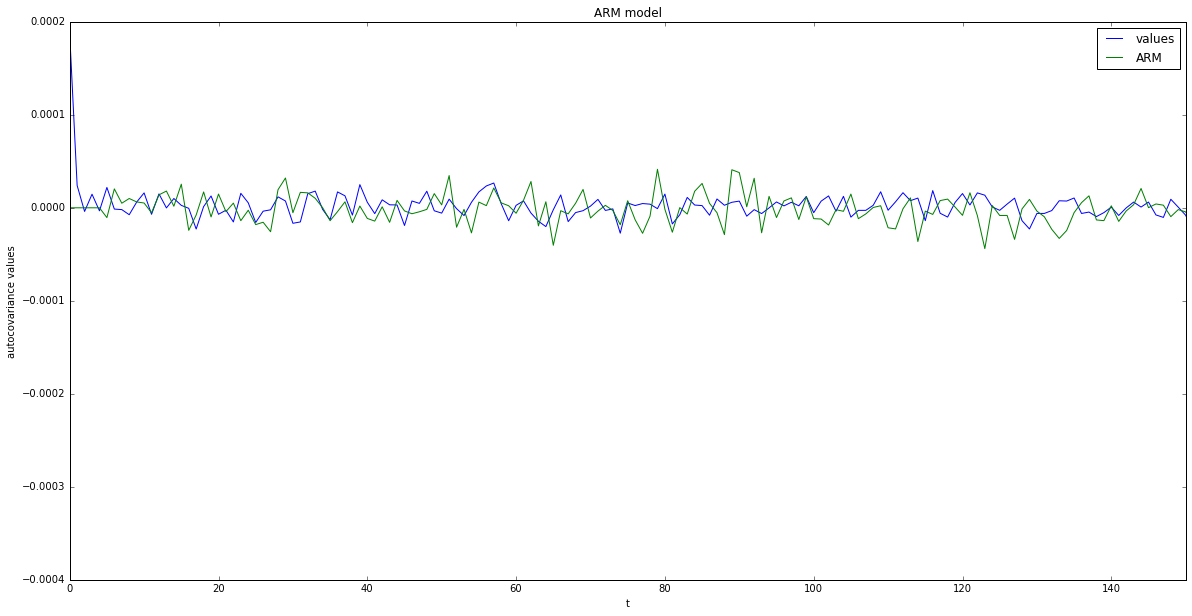

In [90]:
ARO = 4 + 1

A = np.matrix(np.array([[ cov(int(math.fabs(j-i)), values) for j in range(0,ARO)] for i in range(0,ARO)]))
# print(A)   

B = [ cov(int(i + 1), values) for i in range(0, ARO)]
# print(B)   

X = np.linalg.solve(A, B)
# print(X)


D = X[0] + sum([ X[i] * cov(i+1, values) for i in range(0, ARO)])

noise = np.random.normal(0, D, len(values))

ARM = np.zeros(len(values)-1)

for i in range(ARO, len(values)-1):
#     print("i =",i)
    summ = 0
    for j in range(0, ARO-1):
#         print("j =",j)
        if values[i-(j+1)] !=0: 
#             print("if")
            summ += X[j]*values[i-(j+1)]
        else: 
#             print("else")
            summ += X[j]*ARM[i-(j+1)]
#         print("summ =",summ)
    ARM[i] = (summ + noise[i])/10000
        
        
    
# print(ARM)


x = [i for i in range(0, len(values) - 1)]
y = autocov(values)

plt.figure(figsize=(20, 10))
plt.title('ARM model')
plt.xlabel('t')
plt.ylabel('autocovariance values')
plt.plot(x, y, label="values")
plt.plot(x, ARM, label="ARM")
plt.legend()
plt.show()



plt.figure(figsize=(20, 10))
plt.title('ARM model')
plt.xlabel('t')
plt.ylabel('autocovariance values')
plt.plot(x, y, label="values")
plt.plot(x, ARM, label="ARM")
plt.xlim(0,150)
plt.legend()
plt.show()


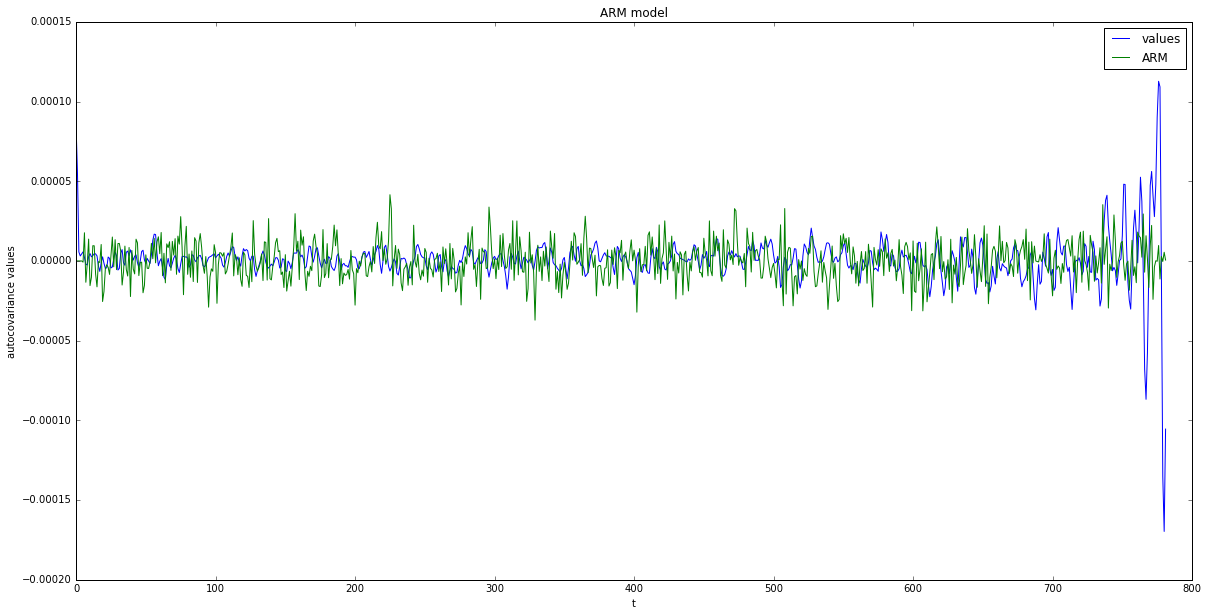

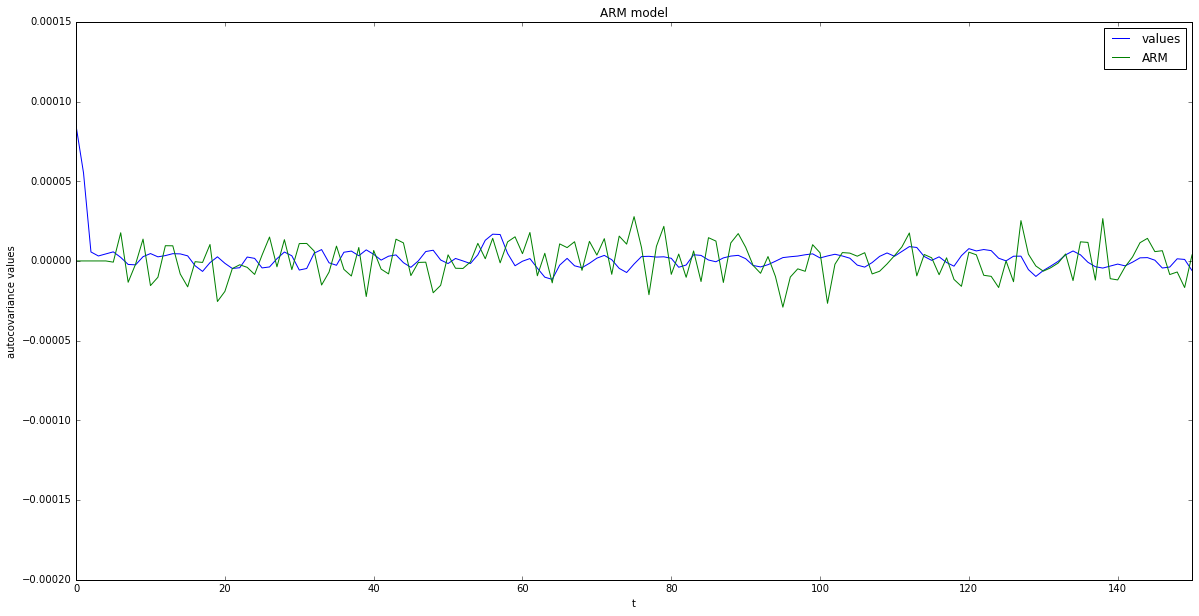

In [72]:
ARO = 4 + 1

A = np.matrix(np.array([[ cov(int(math.fabs(j-i)), sma_values) for j in range(0,ARO)] for i in range(0,ARO)]))
# print(A)   

B = [ cov(int(i + 1), sma_values) for i in range(0, ARO)]
# print(B)   

X = np.linalg.solve(A, B)
# print(X)


D = X[0]+ sum([ X[i] * cov(i+1, sma_values) for i in range(0, ARO)])

noise = np.random.normal(0, D, len(sma_values))

ARM = np.zeros(len(sma_values)-1)

for i in range(ARO, len(sma_values)-1):
#     print("i =",i)
    summ = 0
    for j in range(0, ARO-1):
#         print("j =",j)
        if values[i-(j+1)] !=0: 
#             print("if")
            summ += X[j]*sma_values[i-(j+1)]
        else: 
#             print("else")
            summ += X[j]*ARM[i-(j+1)]
#         print("summ =",summ)
    ARM[i] = (summ + noise[i])/10000
        
        
    
# print(ARM)


x = [i for i in range(0, len(sma_values) - 1)]
y = autocov(sma_values)

plt.figure(figsize=(20, 10))
plt.title('ARM model')
plt.xlabel('t')
plt.ylabel('autocovariance values')
plt.plot(x, y, label="values")
plt.plot(x, ARM, label="ARM")
plt.legend()
plt.show()



plt.figure(figsize=(20, 10))
plt.title('ARM model')
plt.xlabel('t')
plt.ylabel('autocovariance values')
plt.plot(x, y, label="values")
plt.plot(x, ARM, label="ARM")
plt.xlim(0,150)
plt.legend()
plt.show()


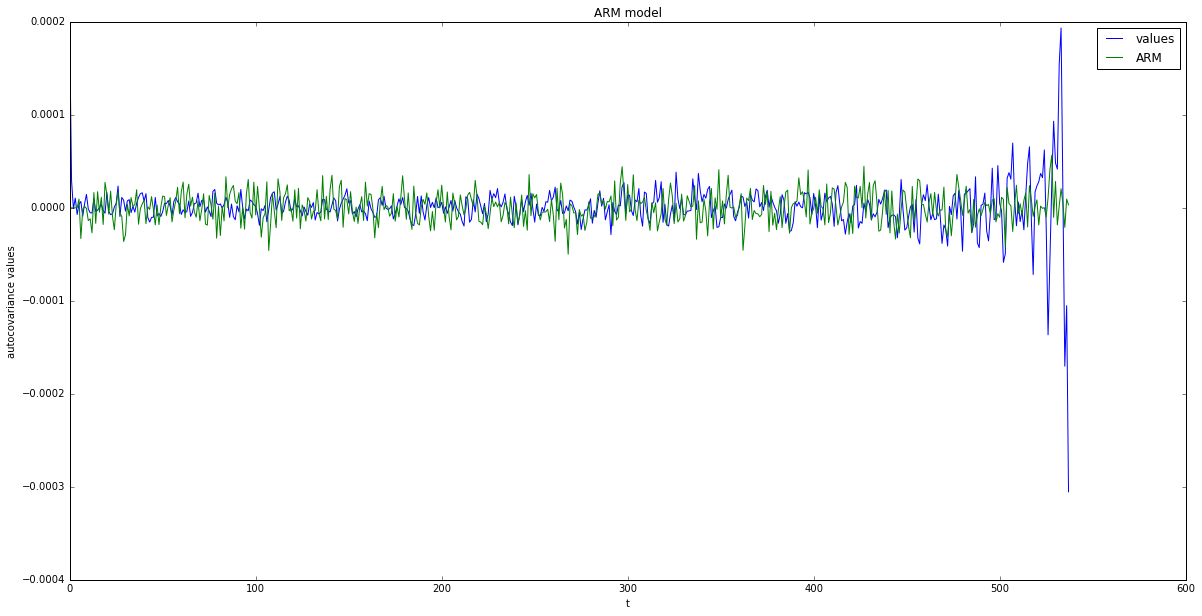

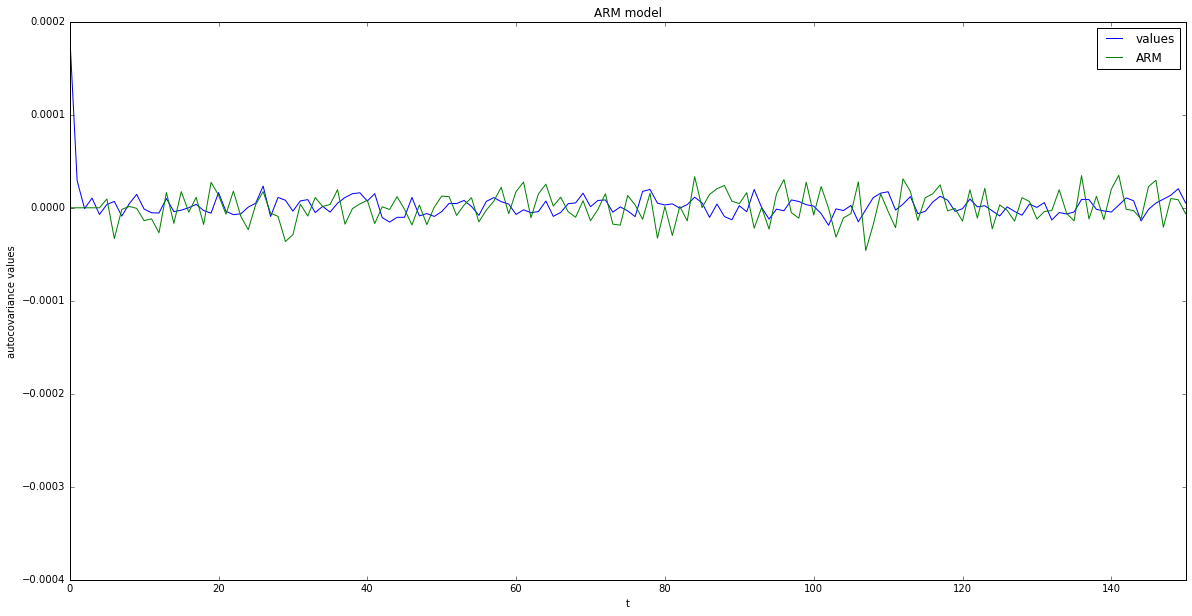

In [93]:
valuesForARO = raw_data.values[:,1]

ARO = 4 + 1


A = np.matrix(np.array([[ cov(int(math.fabs(j-i)), valuesForARO) for j in range(0,ARO)] for i in range(0,ARO)]))
# print(A)   

B = [ cov(int(i + 1), valuesForARO) for i in range(0, ARO)]
# print(B)   

X = np.linalg.solve(A, B)
# print(X)


D = X[0] + sum([ X[i] * cov(i+1, valuesForARO) for i in range(0, ARO)])

noise = np.random.normal(0, D, len(valuesForARO))

ARM = np.zeros(len(valuesForARO)-1)

for i in range(ARO, len(valuesForARO)-1):
#     print("i =",i)
    summ = 0
    for j in range(0, ARO-1):
#         print("j =",j)
        if values[i-(j+1)] !=0: 
#             print("if")
            summ += X[j]*valuesForARO[i-(j+1)]
        else: 
#             print("else")
            summ += X[j]*ARM[i-(j+1)]
#         print("summ =",summ)
    ARM[i] = (summ + noise[i])/10000
        
        
    
# print(ARM)


x = [i for i in range(0, len(valuesForARO) - 1)]
y = autocov(valuesForARO)

plt.figure(figsize=(20, 10))
plt.title('ARM model')
plt.xlabel('t')
plt.ylabel('autocovariance values')
plt.plot(x, y, label="values")
plt.plot(x, ARM, label="ARM")
plt.legend()
plt.show()



plt.figure(figsize=(20, 10))
plt.title('ARM model')
plt.xlabel('t')
plt.ylabel('autocovariance values')
plt.plot(x, y, label="values")
plt.plot(x, ARM, label="ARM")
plt.xlim(0,150)
plt.legend()
plt.show()

In [168]:
# ISE1	ISE2	SP1	DAX1	FTSE1	NIKKEI1	BOVESPA1	EU1	EM	ISE3	ISE4	SP2	DAX2	FTSE2	NIKKE2	BOVESPA2	EU2	EM2
import datetime
import pandas as pd
import matplotlib.pyplot as plt



cols = ['date','ISE1','ISE2','SP1','DAX1','FTSE1','NIKKEI1','BOVESPA1','EU1','EM','ISE3','ISE4','SP2','DAX2','FTSE2','NIKKE2','BOVESPA2','EU2','EM2']


def month_converter(month):
    split = str(month).split("-")
    month = split[1]
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return datetime.datetime(day=int(split[0]), month=months.index(month) + 1, year=int("20"+split[2]))

locale.setlocale(locale.LC_NUMERIC, '')
rawdata = pd.read_csv('Istanbul_StockMarket_09-11.txt', delimiter='\t', names=cols,header=0, converters=converters)
rawdata['date'] = rawdata['date'].apply(month_converter)
rawdata['ISE2'] = rawdata['ISE2'].str.replace(',', '.').astype('float')
rawdata['SP1'] = rawdata['SP1'].str.replace(',', '.').astype('float')
rawdata['DAX1'] = rawdata['DAX1'].str.replace(',', '.').astype('float')
rawdata['FTSE1'] = rawdata['FTSE1'].str.replace(',', '.').astype('float')
rawdata['NIKKEI1'] = rawdata['NIKKEI1'].str.replace(',', '.').astype('float')
rawdata['BOVESPA1'] = rawdata['BOVESPA1'].str.replace(',', '.').astype('float')
rawdata['EU1'] = rawdata['EU1'].str.replace(',', '.').astype('float')
rawdata['EM'] = rawdata['EM'].str.replace(',', '.').astype('float')
rawdata['ISE3'] = rawdata['ISE3'].str.replace(',', '.').astype('float')
rawdata['ISE4'] = rawdata['ISE4'].str.replace(',', '.').astype('float')
rawdata['SP2'] = rawdata['SP2'].str.replace(',', '.').astype('float')
rawdata['DAX2'] = rawdata['DAX2'].str.replace(',', '.').astype('float')
rawdata['FTSE2'] = rawdata['FTSE2'].str.replace(',', '.').astype('float')
rawdata['NIKKE2'] = rawdata['NIKKE2'].str.replace(',', '.').astype('float')
rawdata['BOVESPA2'] = rawdata['BOVESPA2'].str.replace(',', '.').astype('float')
rawdata['EU2'] = rawdata['EU2'].str.replace(',', '.').astype('float')
rawdata['EM2'] = rawdata['EM2'].str.replace(',', '.').astype('float')


# print(rawdata['EU1'].values)

print(len(rawdata['EU1']))



536


[ -5.89844228e-05  -1.88840596e-04  -3.61310973e-05 ...,  -3.61310925e-05
  -1.88840588e-04  -5.89844208e-05]
1071


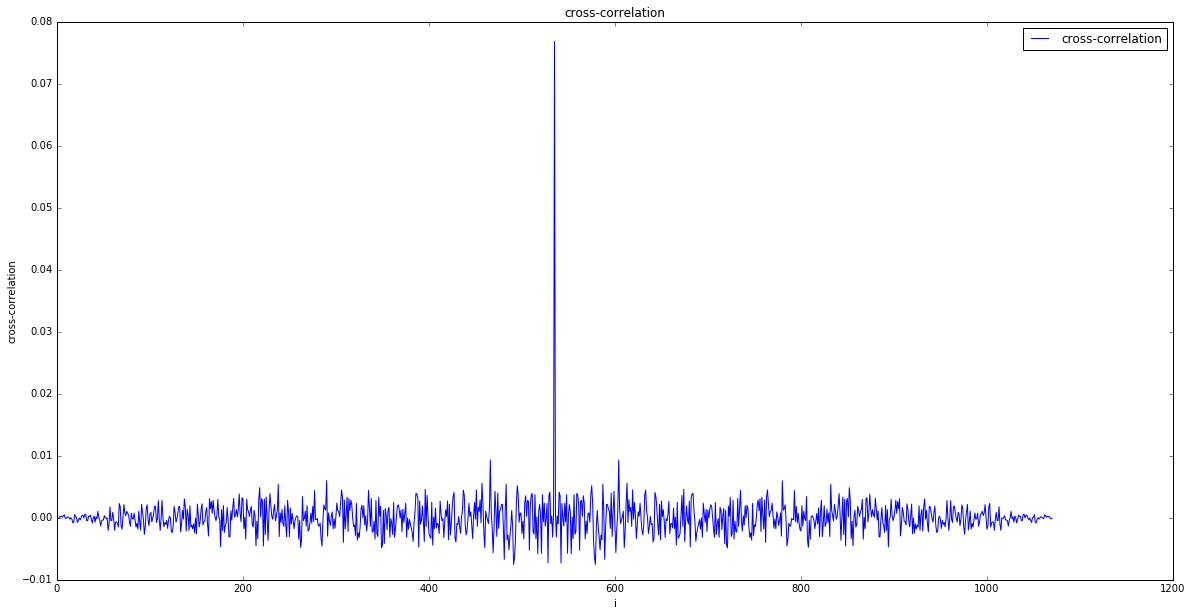

In [172]:
corr = numpy.correlate(rawdata['EU1'].values,rawdata['EU2'].values, mode='full')
print(corr)
print(len(corr))

x = [i for i in range(0, len(corr) )]
y = corr

plt.figure(figsize=(20, 10))
plt.title('cross-correlation')
plt.xlabel('i')
plt.ylabel('cross-correlation')
plt.plot(x, y, label="cross-correlation")
plt.legend()
plt.show()


[-0.00017826 -0.00055928 -0.00020007 ...,  0.00013218 -0.00033534
 -0.00020984]
1071


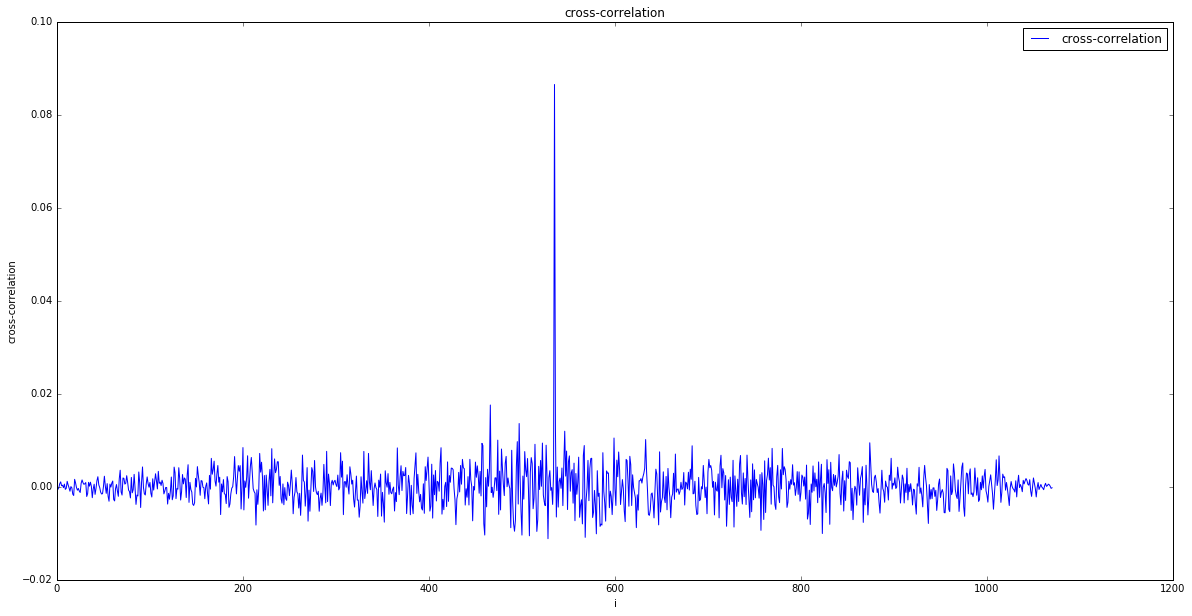

In [173]:
corr = numpy.correlate(rawdata['ISE2'].values,rawdata['EU2'].values, mode='full')
print(corr)
print(len(corr))

x = [i for i in range(0, len(corr) )]
y = corr

plt.figure(figsize=(20, 10))
plt.title('cross-correlation')
plt.xlabel('i')
plt.ylabel('cross-correlation')
plt.plot(x, y, label="cross-correlation")
plt.legend()
plt.show()



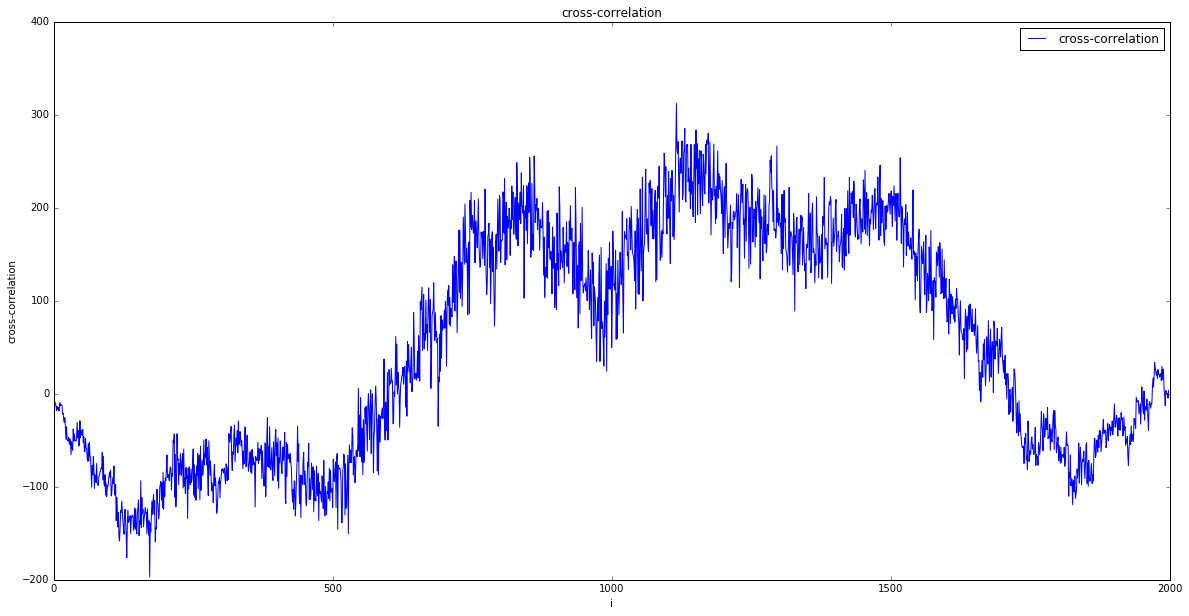

In [180]:
import numpy as np

# create a vector
vector = np.random.normal(0,1,size=1000) 
vector2 = np.random.normal(5,1,size=1000) 

# insert a signal into vector
# vector[::50]+=10

# perform cross-correlation for all data points
output = np.correlate(vector,vector2,mode='full')

y = output
x = [i for i in range(0, len(y) )]

plt.figure(figsize=(20, 10))
plt.title('cross-correlation')
plt.xlabel('i')
plt.ylabel('cross-correlation')
plt.plot(x, y, label="cross-correlation")
plt.legend()
plt.show()
